# Investor Risk Tolerance 


## Problem statement

The goal of this case study is to build a machine learning model to predict the risk tolerance or risk aversion of an investor, and use the model in a robo-advisor dashboard.

## Variable definition 

- AGE: This are the ages of the respondents. 

- EDUCATION_LEVEL: There are four education categories, where 1 represents no high school and 4 represents college degree.

- MARITAL_STATUS: There are two categories to represent marital status, where 1 represents married and 2 represents unmarried.

- OCCUPATION_CATEGORY: This represents occupation category. A value of 1 represents managerial status and 4 represents unemployed.

- NO_OF_KIDS: Number of children.

- SPENDING_LEVEL: This is how individual’s spend their income ranging from ! for most spending to 5 for least spending.

- INCOME: This represents the income of the individual.

- SPENDING_VS_INCOME: This represents the individual’s spending versus income, split into three categories. For example, 1 represents spending exceeded income.

- NETWORTH: This represents networth of the respomdents.

- RISK_LEVEL: This represents the willingness to take risk on a scale of 1 to 4, where 1 represents the highest level of willingness to take risk.

-  RISK_TOLERANCE: This is the predicted variable for this case study.

## Data collection 
For this case study the data used is from survey of Consumer Finances which is conducted by the Federal Reserve Board. The data source is :https://github.com/tatsath/fin-ml/tree/bc10f73984d23e1e968b63c4066228d603ca02fb/Chapter%205%20-%20Sup.%20Learning%20-%20Regression%20and%20Time%20Series%20models/Case%20Study%203%20-%20Investor%20Risk%20Tolerance%20and%20Robo-advisors


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from catboost import CatBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor


In [ ]:
data = pd.read_csv("D:\\Investor_Risk_Tolerance_and_Robo-Advisor\\data\\raw\\Risk_data.csv")
data

,Unnamed: 0,AGE07,EDCL07,MARRIED07,KIDS07,LIFECL07,OCCAT107,INCOME07,RISK07,WSAVED07,SPENDMOR07,NETWORTH07,TrueRiskTol
0,0,47,2,1,0,2,1,56443.744181,3,1,5,352641.71130,6.947439
1,1,47,2,1,0,2,1,56443.744181,3,1,5,340525.21881,6.223158
2,2,47,2,1,0,2,1,56443.744181,3,1,5,348696.08426,6.676709
3,3,47,2,1,0,2,1,56443.744181,3,1,5,351802.87720,6.286854
4,4,47,2,1,0,2,1,56443.744181,3,1,5,358958.85696,6.177016
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4805,19280,50,4,2,0,1,2,78808.246592,2,2,5,653876.35532,5.978830
4806,19281,50,4,2,0,1,2,78808.246592,2,2,5,655843.99086,5.941754
4807,19282,50,4,2,0,1,2,77743.270286,2,2,5,654911.95297,5.903461
4808,19283,50,4,2,0,1,2,77743.270286,2,2,5,654911.95297,5.903461


### Data Cleaning
- Handling Missing values
- Handling Duplicates
- Check data type
- Understand the dataset


In [3]:
data.columns

Index(['Unnamed: 0', 'AGE07', 'EDCL07', 'MARRIED07', 'KIDS07', 'LIFECL07',
       'OCCAT107', 'INCOME07', 'RISK07', 'WSAVED07', 'SPENDMOR07',
       'NETWORTH07', 'TrueRiskTol'],
      dtype='object')

In [4]:
data.shape 

(4810, 13)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4810 entries, 0 to 4809
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   4810 non-null   int64  
 1   AGE07        4810 non-null   int64  
 2   EDCL07       4810 non-null   int64  
 3   MARRIED07    4810 non-null   int64  
 4   KIDS07       4810 non-null   int64  
 5   LIFECL07     4810 non-null   int64  
 6   OCCAT107     4810 non-null   int64  
 7   INCOME07     4810 non-null   float64
 8   RISK07       4810 non-null   int64  
 9   WSAVED07     4810 non-null   int64  
 10  SPENDMOR07   4810 non-null   int64  
 11  NETWORTH07   4810 non-null   float64
 12  TrueRiskTol  4810 non-null   float64
dtypes: float64(3), int64(10)
memory usage: 488.6 KB


In [ ]:
data.isnull().sum()

Unnamed: 0     0
AGE07          0
EDCL07         0
MARRIED07      0
KIDS07         0
LIFECL07       0
OCCAT107       0
INCOME07       0
RISK07         0
WSAVED07       0
SPENDMOR07     0
NETWORTH07     0
TrueRiskTol    0
dtype: int64

In [7]:
data.duplicated().sum()

0

In [ ]:
data.describe()

,Unnamed: 0,AGE07,EDCL07,MARRIED07,KIDS07,LIFECL07,OCCAT107,INCOME07,RISK07,WSAVED07,SPENDMOR07,NETWORTH07,TrueRiskTol
count,4810.000000,4810.000000,4810.000000,4810.000000,4810.000000,4810.00000,4810.000000,4.810000e+03,4810.000000,4810.000000,4810.000000,4.810000e+03,4810.000000
mean,9915.072349,55.513721,3.311850,1.207277,0.769647,4.11185,1.708732,1.175117e+06,2.833056,2.616424,3.530146,1.870233e+07,10.778694
std,5662.856824,13.512250,0.960893,0.405397,1.094113,1.50923,0.829500,4.990972e+06,0.808942,0.674415,1.306774,8.159961e+07,15.853115
min,0.000000,22.000000,1.000000,1.000000,0.000000,1.00000,1.000000,0.000000e+00,1.000000,1.000000,1.000000,-5.633237e+06,0.450112
25%,4927.250000,45.250000,2.000000,1.000000,0.000000,3.00000,1.000000,6.496355e+04,2.000000,2.000000,2.000000,2.139545e+05,1.032562
50%,10175.500000,56.000000,4.000000,1.000000,0.000000,5.00000,1.000000,1.160824e+05,3.000000,3.000000,4.000000,7.159087e+05,4.047974
75%,14831.750000,65.000000,4.000000,1.000000,1.000000,5.00000,2.000000,3.237528e+05,3.000000,3.000000,5.000000,4.333743e+06,13.620327
max,19284.000000,95.000000,4.000000,2.000000,7.000000,6.00000,4.000000,6.838213e+07,4.000000,3.000000,5.000000,1.451956e+09,98.604330


In [9]:
data.apply(lambda x: len(x.unique()))

Unnamed: 0     4810
AGE07            69
EDCL07            4
MARRIED07         2
KIDS07            8
LIFECL07          6
OCCAT107          4
INCOME07        932
RISK07            4
WSAVED07          3
SPENDMOR07        5
NETWORTH07     3743
TrueRiskTol    3708
dtype: int64

### Key takeaways
- The data is quite clean with no missing values and duplicates.
- the data is made up of numerical values only no need for a label encoding. 
- Some variables are skewed hence we will perfom some log transformation. 
- We will drop the Unnamed:0 column
- We will also rename the columns 

In [10]:
#Drop the unnamed column
data = data.drop(['Unnamed: 0'], axis=1)


In [11]:
# renaming the columns 
def rename_cols(data):
    columns = {
        'AGE07': 'AGE', 'EDCL07': 'EDUCATION_LEVEL', 'MARRIED07': 'MARITAL_STATUS',
        'KIDS07': 'NO_OF_KIDS', 'OCCAT107': 'OCCUPATION_CATEGORY', 'INCOME07': 'INCOME',
        'RISK07': 'RISK_LEVEL', 'WSAVED07': 'SPENDING_VS_INCOME', 'SPENDMOR07': 'SPENDING_LEVEL',
        'NETWORTH07': 'NETWORTH', 'TrueRiskTol': 'RISK_TOLERANCE'
    }
    
    data = data.rename(columns=columns)
    return data

data = rename_cols(data)

    

In [12]:
print(data.columns) 

Index(['AGE', 'EDUCATION_LEVEL', 'MARITAL_STATUS', 'NO_OF_KIDS', 'LIFECL07',
       'OCCUPATION_CATEGORY', 'INCOME', 'RISK_LEVEL', 'SPENDING_VS_INCOME',
       'SPENDING_LEVEL', 'NETWORTH', 'RISK_TOLERANCE'],
      dtype='object')


## EXPLORATORY DATA ANALYSIS

In [13]:
target_feature = 'RISK_TOLERANCE'
print(f'Target Feature:', target_feature)

discrete_features = [feature for feature in data.columns if len(data[feature].unique())<25]
print(f'Discrete Features:', discrete_features)

continuous_features = [feature for feature in data.columns if feature not in discrete_features and feature not in target_feature]
print(f'Continuous Features:', continuous_features)

Target Feature: RISK_TOLERANCE
Discrete Features: ['EDUCATION_LEVEL', 'MARITAL_STATUS', 'NO_OF_KIDS', 'LIFECL07', 'OCCUPATION_CATEGORY', 'RISK_LEVEL', 'SPENDING_VS_INCOME', 'SPENDING_LEVEL']
Continuous Features: ['AGE', 'INCOME', 'NETWORTH']


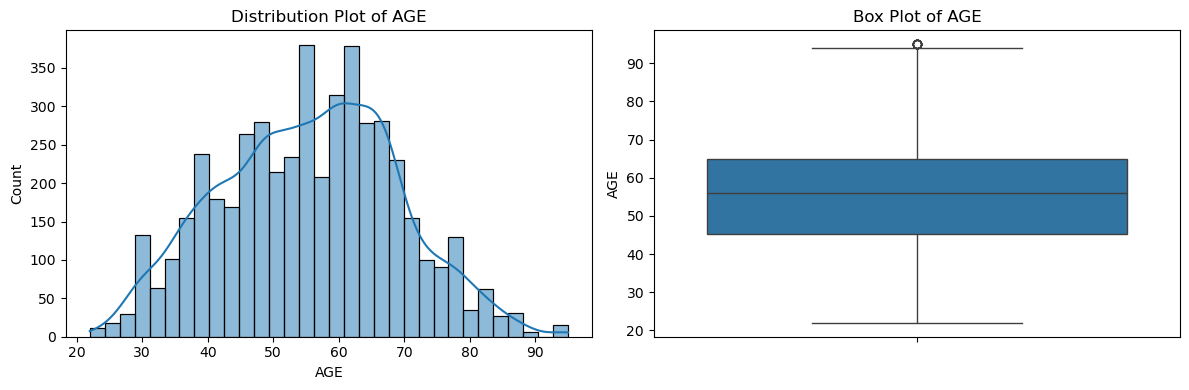

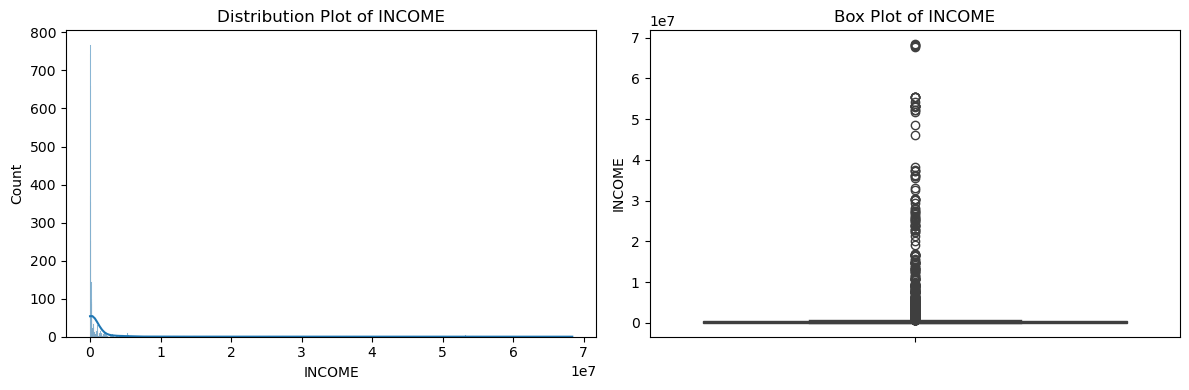

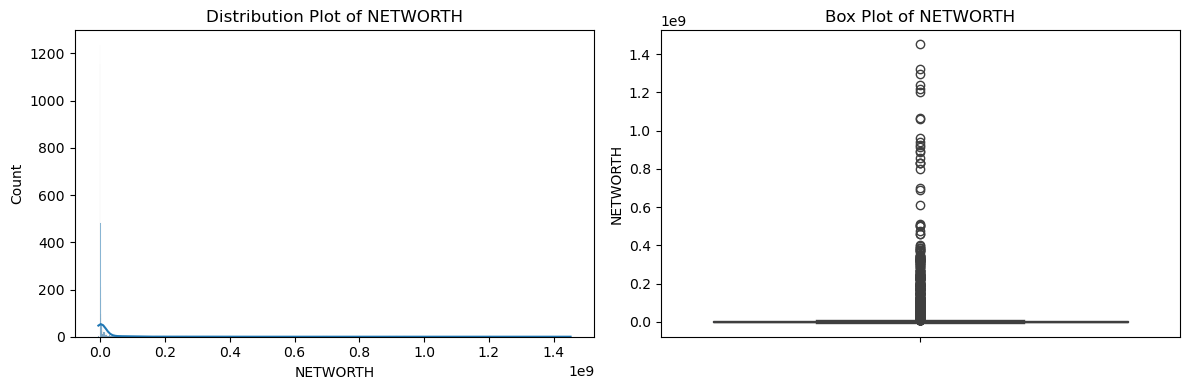

In [14]:
# Plotting the distribution of continuous features
for col in continuous_features:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))  

    # Histogram with KDE
    sns.histplot(data[col], kde=True, ax=axes[0])
    axes[0].set_title(f'Distribution Plot of {col}')

    # Boxplot
    sns.boxplot(y=data[col], ax=axes[1])
    axes[1].set_title(f'Box Plot of {col}')

    plt.tight_layout() 
    plt.show()

- We can see that the columns income and nethwort are highly skewed and also with alot of outliers so we will perform log transformation on them.
- The age column has a normal distributuin with only one outlier which is okay . 

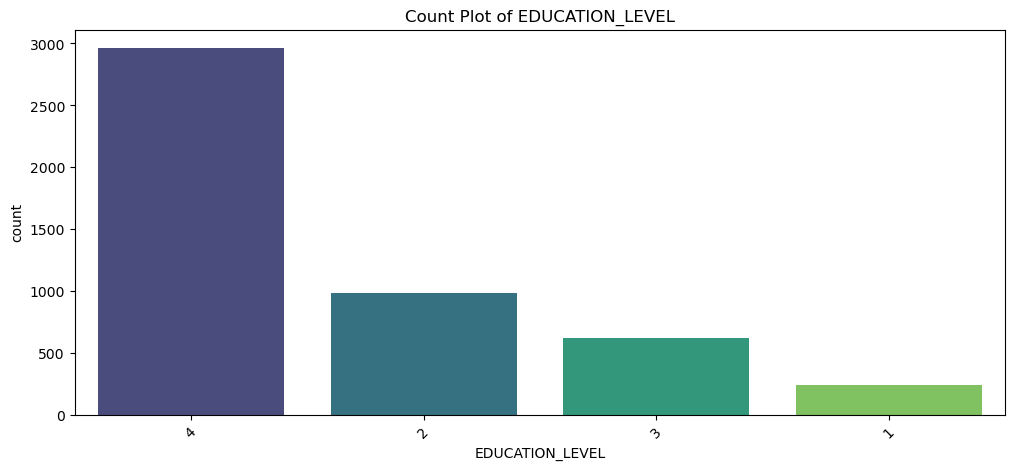

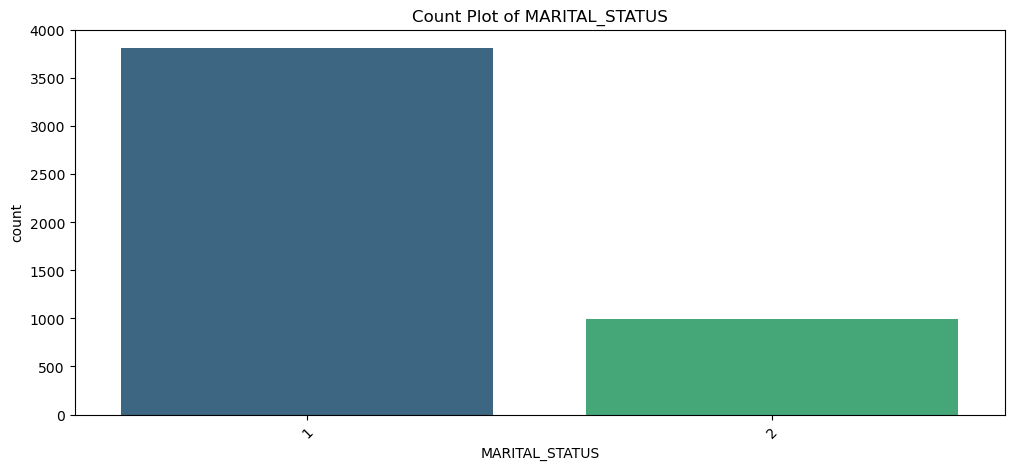

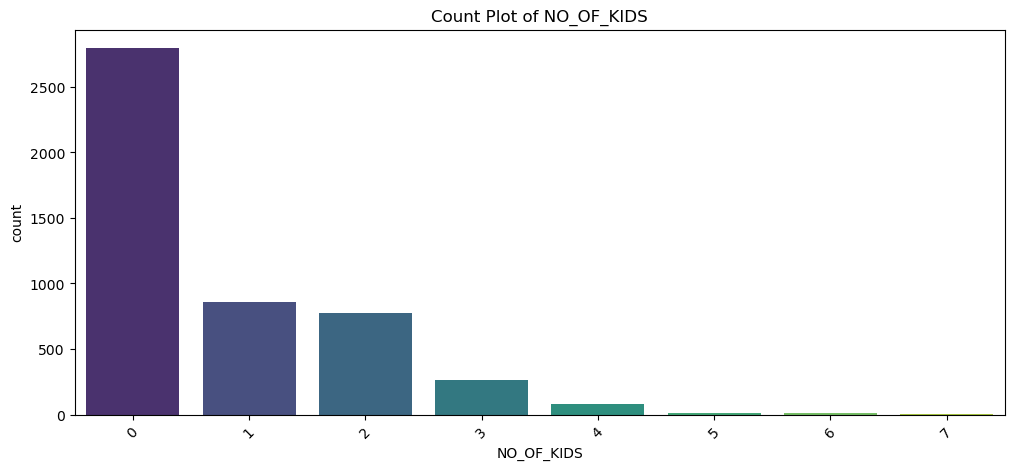

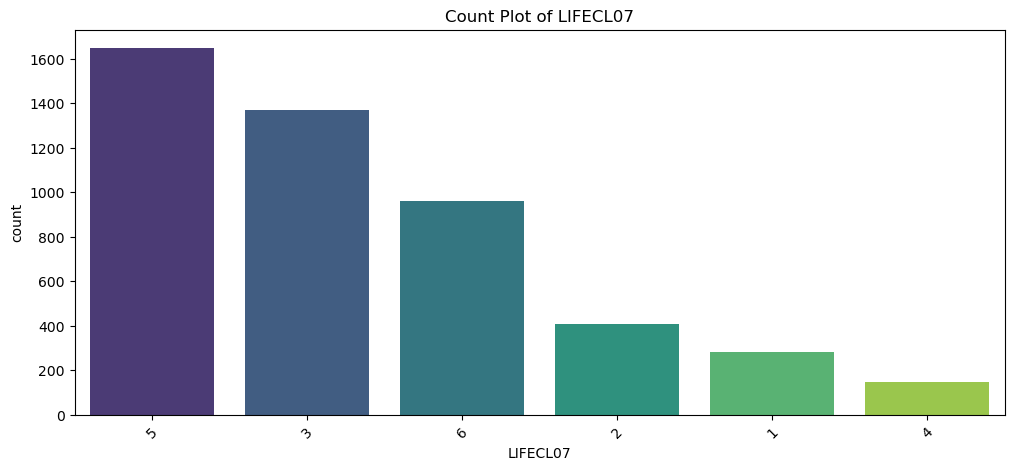

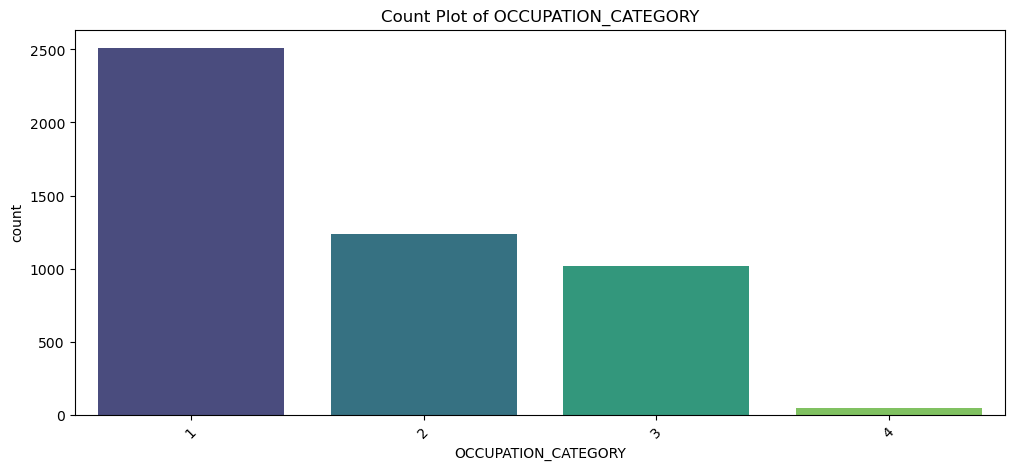

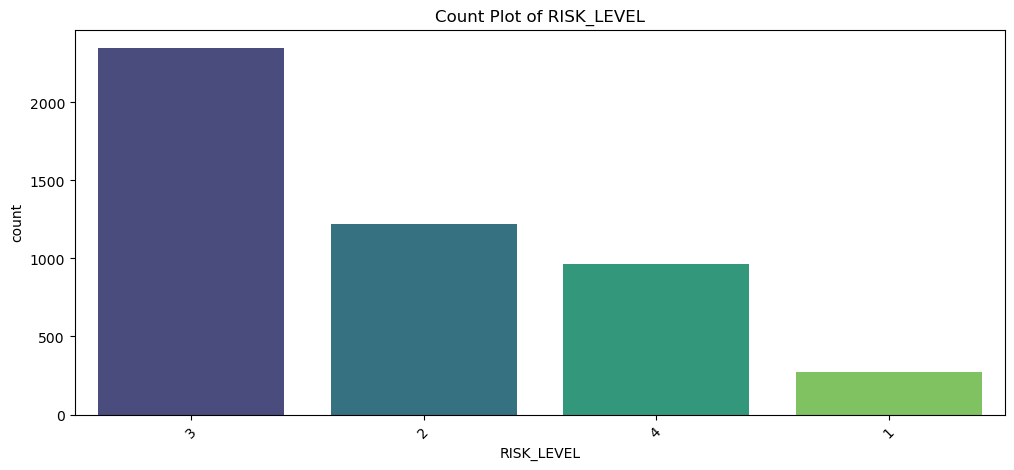

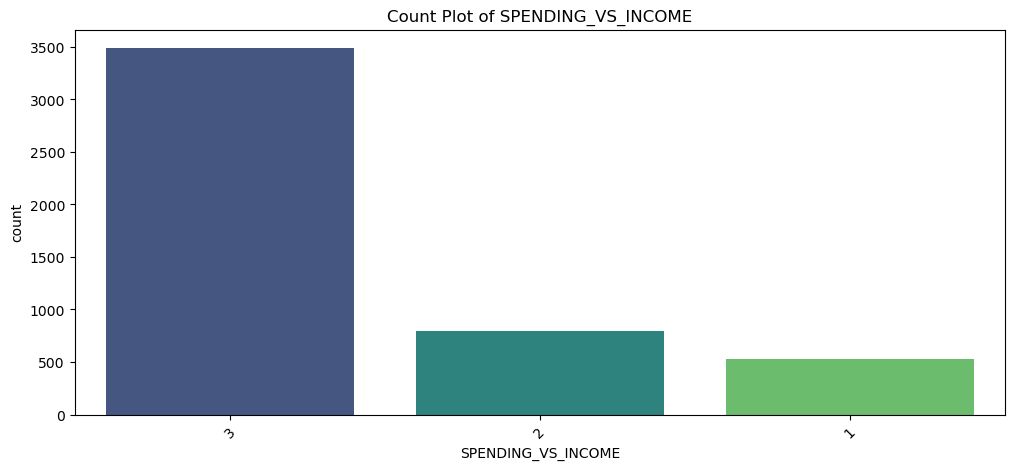

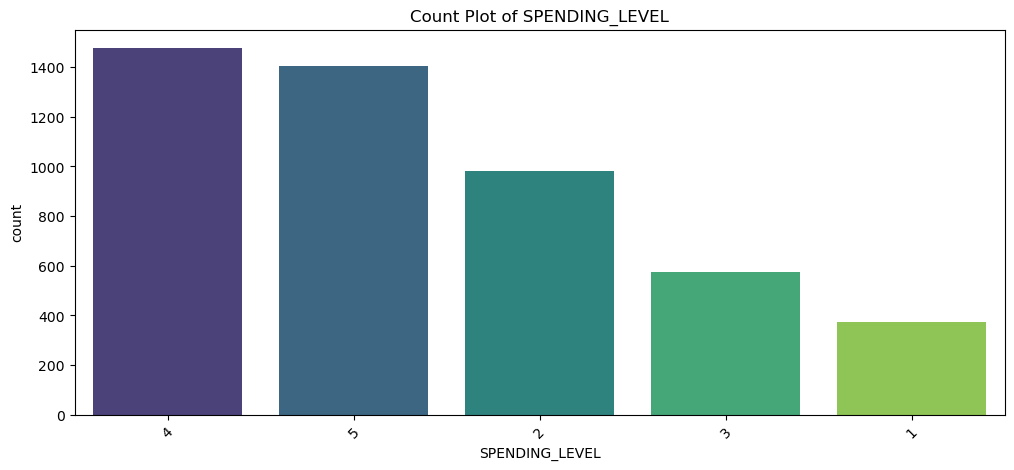

In [15]:
# Plotting the count plots for discrete features
for col in discrete_features:
    plt.figure(figsize=(12, 5))
    sns.countplot(data=data, x=col,palette='viridis', order=data[col].value_counts().index)  
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45)  
    plt.show()

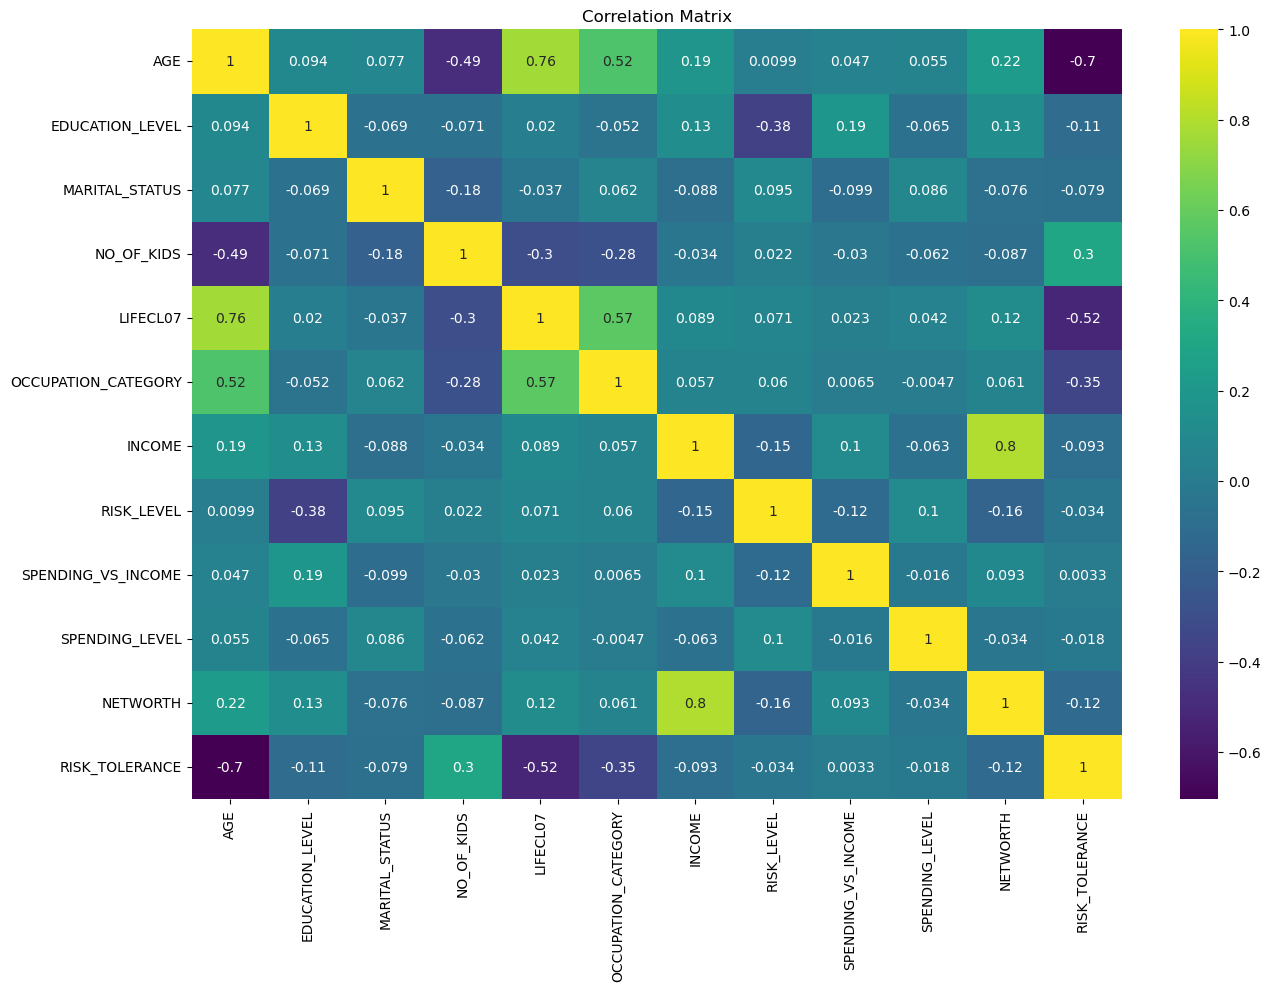

In [16]:
#correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title('Correlation Matrix')
plt.show()

In [17]:
## log transformation
data['NETWORTH'] = np.log1p(data['NETWORTH'])
data['INCOME'] = np.log1p(data['INCOME'])

In [18]:
data.isnull().sum()

AGE                     0
EDUCATION_LEVEL         0
MARITAL_STATUS          0
NO_OF_KIDS              0
LIFECL07                0
OCCUPATION_CATEGORY     0
INCOME                  0
RISK_LEVEL              0
SPENDING_VS_INCOME      0
SPENDING_LEVEL          0
NETWORTH               35
RISK_TOLERANCE          0
dtype: int64

- We can see that after log transformation nethworth had zeros this is because they had a negative nethworth ie they were in debt, we will impute the missing values 

In [20]:
from sklearn.impute import SimpleImputer

# Impute missing values
imputer = SimpleImputer(strategy='mean')
data['NETWORTH'] = imputer.fit_transform(data[['NETWORTH']]) 

## Modelling 

In [21]:
X = data.drop(['RISK_TOLERANCE'], axis=1)
y = data['RISK_TOLERANCE']
print(X.shape, y.shape)

(4810, 11) (4810,)


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [23]:
##Create a Function to Evaluate Model
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [24]:
## Beginning Model Training
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "CatBoost Regressor": CatBoostRegressor(verbose=False),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGB Regressor": XGBRegressor()
}



for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)


    print(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))

    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 10.5527
- Mean Absolute Error: 7.0431
- R2 Score: 0.5538
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 10.6588
- Mean Absolute Error: 7.1527
- R2 Score: 0.5588


Decision Tree
Model performance for Training set
- Root Mean Squared Error: 0.0522
- Mean Absolute Error: 0.0066
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 4.1921
- Mean Absolute Error: 0.9283
- R2 Score: 0.9318


CatBoost Regressor
Model performance for Training set
- Root Mean Squared Error: 2.0121
- Mean Absolute Error: 1.1321
- R2 Score: 0.9838
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 3.0984
- Mean Absolute Error: 1.6062
- R2 Score: 0.9627


Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 1.5058
- Mean Absolute Error: 0.4084
- R2 Score: 0.990

- We will go with the Random Forest Regressor as it performed well on the test data with a lower RMSE 
- We will also not be tuning the model as it has achieved a very good accuracy 

In [25]:
#modelling Random Forest Regressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model
score = r2_score(y_test, y_pred) * 100

print("Accuracy of the CatBoost Regressor model is %.2f" % score)



Accuracy of the CatBoost Regressor model is 96.93


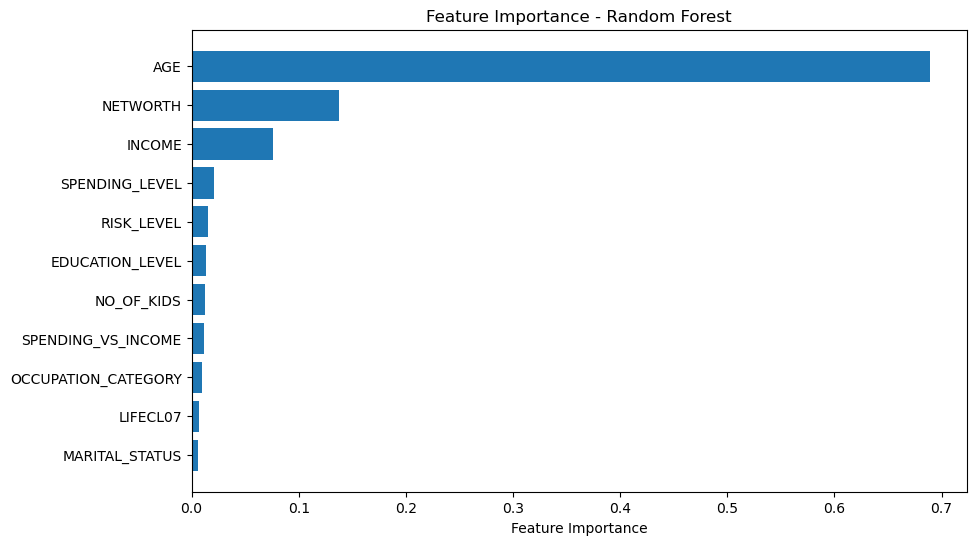

In [26]:
feature_importances = model.feature_importances_
feature_names = X_train.columns

# Sort features by importance
sorted_idx = feature_importances.argsort()
plt.figure(figsize=(10, 6))
plt.barh(feature_names[sorted_idx], feature_importances[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Feature Importance - Random Forest")
plt.show()


- Age,Networth and Income are the main features when it comes to predicting the Risk Tolerance of an individual.